# Broad

Broadening line spectrum with voigt profile

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TRXASprefitpack import gen_theory_data
plt.rcParams["figure.figsize"] = (14,10)

## basic defintion of gen_theory_data

In [2]:
help(gen_theory_data)

Help on function gen_theory_data in module TRXASprefitpack.thy.broad:

gen_theory_data(e, peaks, A, fwhm_G, fwhm_L, peak_shift, out=None)
    voigt broadening theoretically calculated lineshape spectrum
    if out is not none:
    It will make
    out_thy.txt: txt file for rescaled and boroadend calc spectrum
    out_thy_stk.txt: txt file for rescaled and shifted calc peaks
    
    
    :param numpy_1d_array e: energy (unit: eV)
    :param float A: scaling parameter
    :param float fwhm_G: 
     full width at half maximum of gaussian shape (unit: eV)
    :param float fwhm_L: 
     full width at half maximum of lorenzian shape (unit: eV)
    :param float peak_shift: 
     discrepency of peak position between expt data and theoretically 
     broadened spectrum
    :param string out: prefix for output txt file [optional]
    
    
    :return: voigt broadened calc spectrum
    :rtype: numpy_1d_array



## Define line spectrum
Which has three peaks at 2833, 2835, 2838 eV with ratio 2:4:1

In [3]:
peaks = np.array([[2833, 2],
                 [2835, 4],
                 [2838, 2]])

In [4]:
e = np.arange(2830,2845, 0.01)

## Gaussian broadening

1. fwhm_G = 1 eV
2. fwhm_G = 2 eV
3. fwhm_G = 3 eV

In [5]:
gau_broad_1eV = gen_theory_data(e, peaks, 1, 1, 0, 0) # Note voigt profile with fwhm_L = 0 is gaussian
gau_broad_2eV = gen_theory_data(e, peaks, 1, 2, 0, 0) # Note voigt profile with fwhm_L = 0 is gaussian
gau_broad_3eV = gen_theory_data(e, peaks, 1, 3, 0, 0) # Note voigt profile with fwhm_L = 0 is gaussian

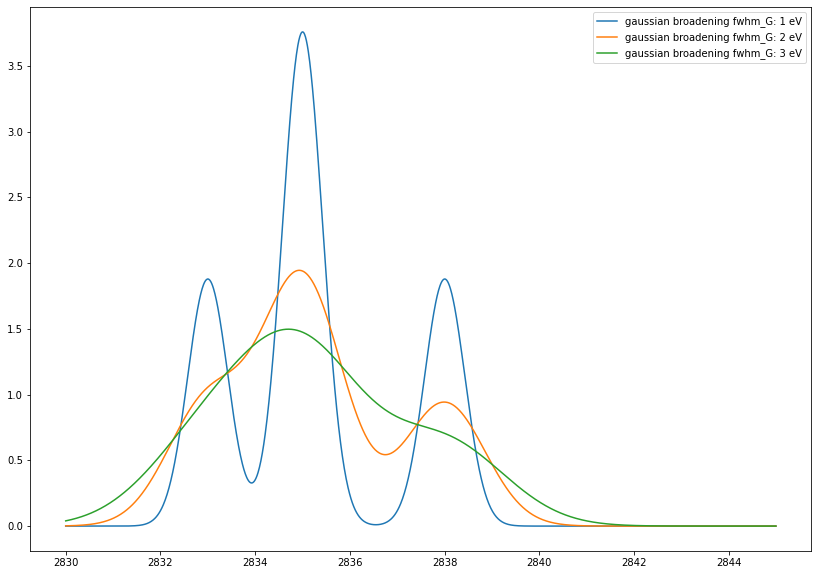

In [6]:
plt.plot(e, gau_broad_1eV, label='gaussian broadening fwhm_G: 1 eV')
plt.plot(e, gau_broad_2eV, label='gaussian broadening fwhm_G: 2 eV')
plt.plot(e, gau_broad_3eV, label='gaussian broadening fwhm_G: 3 eV')
plt.legend()
plt.show()

## Lorenzian broadening

1. fwhm_L = 1 eV
2. fwhm_L = 2 eV
3. fwhm_L = 3 eV

In [7]:
loren_broad_1eV = gen_theory_data(e, peaks, 1, 0, 1, 0) # Note voigt profile with fwhm_G = 0 is lorenzian
loren_broad_2eV = gen_theory_data(e, peaks, 1, 0, 2, 0) # Note voigt profile with fwhm_G = 0 is lorenzian
loren_broad_3eV = gen_theory_data(e, peaks, 1, 0, 3, 0) # Note voigt profile with fwhm_G = 0 is lorenzian

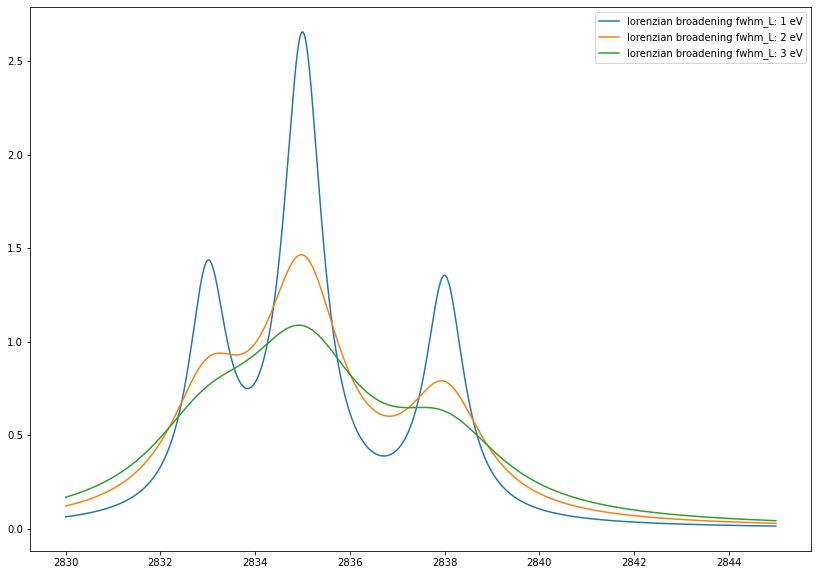

In [8]:
plt.plot(e, loren_broad_1eV, label='lorenzian broadening fwhm_L: 1 eV')
plt.plot(e, loren_broad_2eV, label='lorenzian broadening fwhm_L: 2 eV')
plt.plot(e, loren_broad_3eV, label='lorenzian broadening fwhm_L: 3 eV')
plt.legend()
plt.show()

## voigt broadening

1. fwhm_G = 1.5eV, fwhm_L = 0.5eV
2. fwhm_G = 1.0eV, fwhm_L = 1.0eV
3. fwhm_G = 0.5eV, fwhm_L = 1.5eV

In [9]:
voigt_broad_1 = gen_theory_data(e, peaks, 1, 1.5, 0.5, 0) 
voigt_broad_2 = gen_theory_data(e, peaks, 1, 1.0, 1.0, 0) 
voigt_broad_3 = gen_theory_data(e, peaks, 1, 0.5, 1.5, 0) 

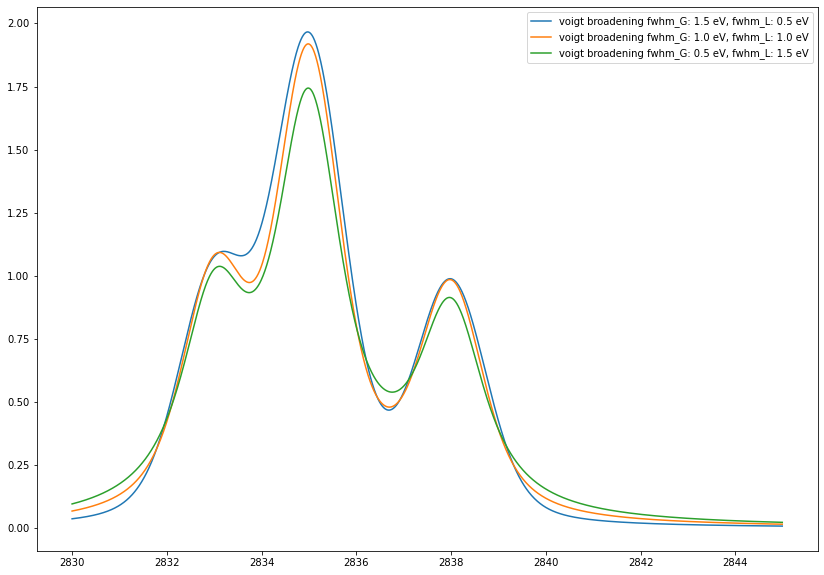

In [10]:
plt.plot(e, voigt_broad_1, label='voigt broadening fwhm_G: 1.5 eV, fwhm_L: 0.5 eV')
plt.plot(e, voigt_broad_2, label='voigt broadening fwhm_G: 1.0 eV, fwhm_L: 1.0 eV')
plt.plot(e, voigt_broad_3, label='voigt broadening fwhm_G: 0.5 eV, fwhm_L: 1.5 eV')
plt.legend()
plt.show()

# peak shift

To see how peak shift afftects broadened spectrum, 
set fwhm_G = fwhm_L = 1.0 eV

In [11]:
voigt_broad_peak_shift0 = gen_theory_data(e, peaks, 1, 1.0, 1.0, 0)
voigt_broad_peak_shiftm5 = gen_theory_data(e, peaks, 1, 1.0, 1.0, -5) 
voigt_broad_peak_shift5 = gen_theory_data(e, peaks, 1, 1.0, 1.0, 5) 

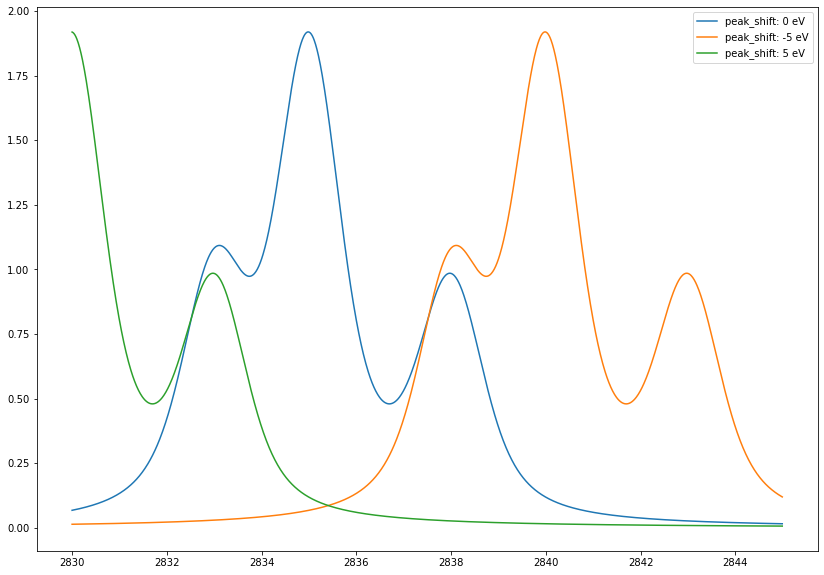

In [12]:
plt.plot(e, voigt_broad_peak_shift0, label='peak_shift: 0 eV')
plt.plot(e, voigt_broad_peak_shiftm5, label='peak_shift: -5 eV')
plt.plot(e, voigt_broad_peak_shift5, label='peak_shift: 5 eV')
plt.legend()
plt.show()

peak_shift moves spectrum to -peak_shift.

## Scaling
To see how scaling afftects spectrum fix fwhm_G=fwhm_L=1.0 eV and peak_shift=0
1. A: 0.5
2. A: 1.0
3. A: 2.0

In [13]:
voigt_broad_scale_half = gen_theory_data(e, peaks, 0.5, 1.0, 1.0, 0)
voigt_broad_scale1 = gen_theory_data(e, peaks, 1, 1.0, 1.0, 0) 
voigt_broad_scale2 = gen_theory_data(e, peaks, 2, 1.0, 1.0, 0) 

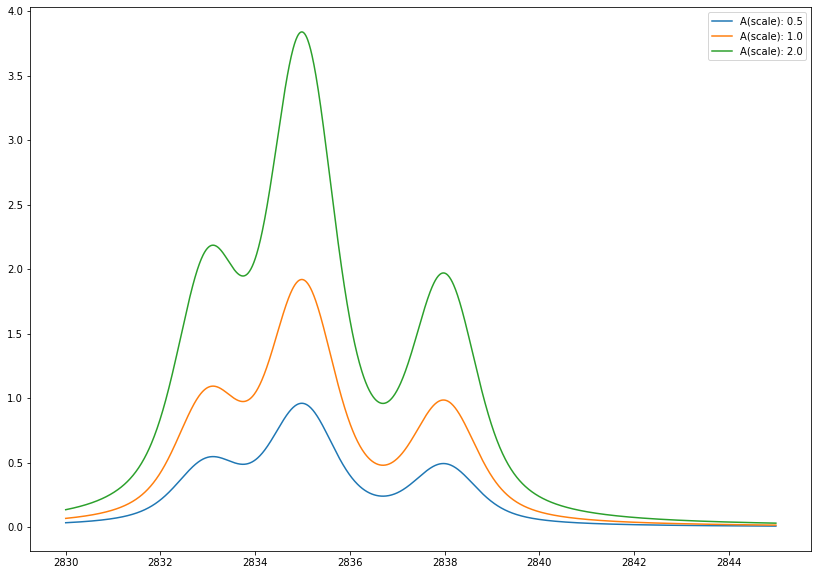

In [14]:
plt.plot(e, voigt_broad_scale_half, label='A(scale): 0.5')
plt.plot(e, voigt_broad_scale1, label='A(scale): 1.0')
plt.plot(e, voigt_broad_scale2, label='A(scale): 2.0')
plt.legend()
plt.show()